In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
base_dir = '/content/gdrive/MyDrive/dataset_daun/'
!ls "/content/gdrive/MyDrive/dataset_daun/"

data  test  train


In [ ]:
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
nangka_dir = os.path.join(data_dir, 'nangka/')
pepaya_dir = os.path.join(data_dir, 'pepaya/')

print("Jumlah gambar daun nangka : ", len(os.listdir(nangka_dir)))
print("Jumlah gambar daun pepaya : ", len(os.listdir(pepaya_dir)))

Jumlah gambar daun nangka :  170
Jumlah gambar daun pepaya :  170


In [ ]:
train_nangka = os.path.join(train_dir, 'nangka/')
train_pepaya = os.path.join(train_dir, 'pepaya/')

test_nangka = os.path.join(test_dir, 'nangka/')
test_pepaya = os.path.join(test_dir, 'pepaya/')

In [ ]:
import random
from shutil import copyfile

def train_test_split(source, train, test, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio*total_size)
  test_size = total_size-train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  test_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source+i
    destinantion = train+i
    copyfile(i_file, destinantion)

  for i in test_files:
    i_file = source+i
    destinantion = test+i
    copyfile(i_file, destinantion)

train_ratio = 0.8

source_00 = nangka_dir
train_00 = train_nangka
test_00 = test_nangka
train_test_split(source_00, train_00, test_00, train_ratio)

source_01 = pepaya_dir
train_01 = train_pepaya
test_01 = test_pepaya
train_test_split(source_01, train_01, test_01, train_ratio)

In [ ]:
print("Jumlah gambar data daun nangka : ", len(os.listdir(nangka_dir)))
print("Jumlah gambar data train daun nangka : ", len(os.listdir(train_nangka)))
print("Jumlah gambar data test daun nangka : ", len(os.listdir(test_nangka)))

print("\nJumlah gambar data daun pepaya : ", len(os.listdir(nangka_dir)))
print("Jumlah gambar data train daun pepaya : ", len(os.listdir(train_pepaya)))
print("Jumlah gambar data test daun pepaya : ", len(os.listdir(test_pepaya)))

Jumlah gambar data daun nangka :  170
Jumlah gambar data train daun nangka :  136
Jumlah gambar data test daun nangka :  34

Jumlah gambar data daun pepaya :  170
Jumlah gambar data train daun pepaya :  136
Jumlah gambar data test daun pepaya :  34


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 272 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=25,
    validation_data = test_generator,
    validation_steps=1,
    verbose=1,
)

Epoch 1/25
6/6 [==============================] - 7s 777ms/step - loss: 0.8591 - accuracy: 0.3833 - val_loss: 0.7049 - val_accuracy: 0.3000
Epoch 2/25
6/6 [==============================] - 4s 662ms/step - loss: 0.6658 - accuracy: 0.6000 - val_loss: 0.6803 - val_accuracy: 0.8000
Epoch 3/25
6/6 [==============================] - 6s 1s/step - loss: 0.6812 - accuracy: 0.5000 - val_loss: 0.6690 - val_accuracy: 0.6000
Epoch 4/25
6/6 [==============================] - 4s 676ms/step - loss: 0.6763 - accuracy: 0.5769 - val_loss: 0.6055 - val_accuracy: 0.7000
Epoch 5/25
6/6 [==============================] - 4s 691ms/step - loss: 0.6774 - accuracy: 0.5667 - val_loss: 0.6642 - val_accuracy: 0.5000
Epoch 6/25
6/6 [==============================] - 5s 774ms/step - loss: 0.6859 - accuracy: 0.5000 - val_loss: 0.6788 - val_accuracy: 0.6000
Epoch 7/25
6/6 [==============================] - 4s 703ms/step - loss: 0.6731 - accuracy: 0.7500 - val_loss: 0.6483 - val_accuracy: 1.0000
Epoch 8/25
6/6 [=======

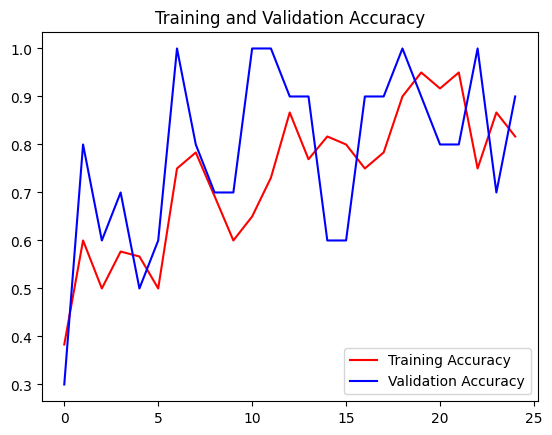

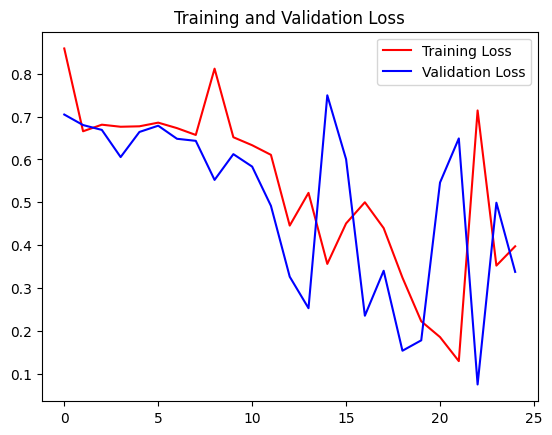

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()

In [ ]:
performance = model.evaluate(test_generator)

7/7 [==============================] - 3s 369ms/step - loss: 0.2578 - accuracy: 0.9706
